<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/BigSound/blob/master/%EA%B0%9C%EC%9D%B8%EB%B6%84%EB%A5%98%EC%A2%85%ED%95%A9(ver2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
Data = pd.read_excel('/content/drive/My Drive/2020산공데분대회/데이터셋/수도권평생학습/수도권전체분류(11-09).xlsx') #전체  Data set
data = pd.read_excel('/content/drive/My Drive/2020산공데분대회/데이터셋/수도권평생학습/개인분류결과/개인분류결과종합.xlsx') #처음 샘플 분류결과

In [4]:
Data.head(), data.head()

(                    강좌명  강사명     교육시작일자  ...   제공기관코드    분류      제공기관명
 0               사진작품연구반  문제민 2020-01-01  ...  3140000  문화예술  서울특별시 양천구
 1     인간 세종대왕, 스토리로 말하다  이상주 2019-04-03  ...  3210000  인문교양  서울특별시 서초구
 2         미디어로 떠나는 역사산책  박진아 2019-04-02  ...  3210000  인문교양  서울특별시 서초구
 3             현장미술 100선  김은영 2019-04-05  ...  3210000  문화예술  서울특별시 서초구
 4  3만원부터 투자가능한 현대미술 이야기  허유림 2019-04-05  ...  3210000  문화예술  서울특별시 서초구
 
 [5 rows x 28 columns],
    Unnamed: 0                            강좌명  강사명  ...  정인분류      제공기관명 혼합도
 0           9                         잡학의 쓸모  공강일  ...    기타  서울특별시 서초구   1
 1         151  Let''s play ABC - A반(13~14년생)  이예랑  ...  학력보완  서울특별시 금천구   1
 2         152  Let''s play ABC - B반(13~14년생)  이예랑  ...  학력보완  서울특별시 금천구   1
 3         153     호기심 과학실험교실(초2~3년, 10~11년생)  홍은정  ...  학력보완  서울특별시 금천구   1
 4         154     호기심 과학실험교실(초2~3년, 10~11년생)  최애진  ...  학력보완  서울특별시 금천구   1
 
 [5 rows x 10 columns])

In [5]:
def make_fusion_level(df): #혼합도 만드는 함수
    target = df[df.columns[4:8]] # 개인분류열만 모은 DataFrame
    fusion_col = [] # 혼합도를 담을 결과리스트
    for i in range(len(target)):
      max_cat = max(target.iloc[i].value_counts()) # 최빈 관찰값(가장 선택을 많이받은 분류)
      branch_cat = len(target.iloc[i].unique()) # 카테고리 분류 가짓 수
      if max_cat==4 and branch_cat==1:
        fusion_col.append(0)
      if max_cat==3 and branch_cat==2:
        fusion_col.append(1)
      if max_cat==2 and branch_cat==2:
        fusion_col.append(2)
      if max_cat==2 and branch_cat==3:
        fusion_col.append(3)
      if max_cat==1 and branch_cat==4:
        fusion_col.append(4)
    return fusion_col   

In [6]:
def to_cat(df, category): #기초문해, 학력보완, 시민참여, 직업교육, 인문교양, 문화예술
    i=0
    result=[]
    while(i<len(df)):
      item_name = df.iloc[i].강좌명
      item_contents = df.iloc[i].강좌내용
      append_count = 0
      for a in range(len(globals()[category[0]])):
        if append_count==1:
          break
        if globals()[category[0]][a] in item_name or globals()[category[0]][a] in item_contents:
          result.append(category[0])
          i+=1
          append_count+=1
          break
      for b in range(len(globals()[category[1]])):
        if append_count==1:
          break
        if globals()[category[1]][b] in item_name or globals()[category[1]][b] in item_contents:
          result.append(category[1])
          i+=1
          append_count+=1
          break
      for c in range(len(globals()[category[2]])):
        if append_count==1:
          break
        if globals()[category[2]][c] in item_name or globals()[category[2]][c] in item_contents:
          result.append(category[2])
          i+=1
          append_count+=1
          break
      for d in range(len(globals()[category[3]])):
        if append_count==1:
          break
        if globals()[category[3]][d] in item_name or globals()[category[3]][d] in item_contents:
          result.append(category[3])
          i+=1
          append_count+=1
          break                          #break시 하위 반복문으로 들어감 append_count가 있어야 '네일컴퓨터교육' 이런게 중첩되서 append되지 않는다.
      for e in range(len(globals()[category[4]])):
        if append_count==1:
          break
        if globals()[category[4]][e] in item_name or globals()[category[4]][e] in item_contents:
          result.append(category[4])
          i+=1
          append_count+=1
          break
      for f in range(len(globals()[category[5]])):
        if append_count==1:
          break
        if globals()[category[5]][f] in item_name or globals()[category[5]][f] in item_contents: #강좌명이나 내용에 위의 키워드가 포함되어 있다면 분류추가
          result.append(category[5]) 
          i+=1
          append_count+=1
          break   
      if append_count!=1:
        result.append('기타')
        append_count+=1
        i+=1
    return result

In [7]:
import random
Category = ['기초문해','학력보완','시민참여','직업교육','인문교양','문화예술'] #이놈의 순서 조절!

In [8]:
ang = ['기초문해','시민참여','직업교육'] # 어느 키워드가 앞에 오는것이 전반적으로 혼합도가 낮은지 실험을 통해 발견! (10에포크실험을 여러번 실행시킨 결과)
cat= ['학력보완','인문교양','문화예술'] 
ho = ang+cat
ho

['기초문해', '시민참여', '직업교육', '학력보완', '인문교양', '문화예술']

In [109]:
for i in range(10):
  random.shuffle(cat) #카테고리 순서를 섞는다(전체 경우의수 6Factorial, 즉 720가지임)  
  epoch = 10 # 각 순서에 대해 Fusion_level 얻는 실험(반복문) loop 횟수
  fusion_level = []
  Category = ang+cat
  for j in range(epoch):
    df1 = Data[Data['분류']=='학력보완']
    df2 = Data[Data['분류']!='학력보완'].sample(n=272,random_state=epoch) #학력보완 아닌것중 272개, random_state계속 변화시키겠다.(epoch수만큼 변화)

    DF = pd.concat([df1,df2]) #합쳐서 300개 
    
    # 각자 키워드로 분류
    Result_df = DF[DF.columns[[0,1,8,-1]]]
    Result = [] # 분류결과 갯수만 담을 것
    #회선
    직업교육 = ['코딩','자격증','직업교육','직업 교육','직업','취업','직장','자격','ITQ','itq','엑셀','창업','직무','기술사','기능사','전문가','토익']
    인문교양 = ['소양','상담','종교','예절','영어','한자','과학','독서','책','인터넷','역사','생활','기독교','불교','천주교','이슬람','힌두교',
            '문학','철학','보건','인문','교양','인문교양','인문학','고전','문학','풍수지리']
    문화예술 = ['수영','테니스','축구','배드민턴','야구','체조','사진','아트','미술','공예','만들기'
            '도자기','댄스','춤','놀이','음악','플롯','기타','베이스','드럼','서예','연극','영화','감상',
            '뮤지컬','공연','극장','요가','문화','예술','문화예술','만화','그림','노래','연주','체육','오락',
            '예체능','구보','헬스','악기','운동','스포츠']
    기초문해 = ['한국어','기초문해','기초 문해','기초 한글','기초 한국어','문자 해독','문해','한글 교실']
    학력보완 = ['검정고시','검정 고시','학력 보완','학력보완','기초 교육','기초교육','학점','학력','학년','석사','박사','학사','초등학','고등학']
    시민참여 = ['인권','주민','자치','지역공동체','지역자치','양성평등','지역리더','평생학습','평생 학습', '기본권','시민 리더'
    '시민참여','시민 참여']

    Result_df['회선분류'] = to_cat(DF,Category) # 300개에대한 회선 분류결과
    Result.append(Result_df['회선분류'].value_counts())

    #정인
    직업교육 = ['기능사', '파워포인트', 'ppt', '엑셀', '워드', '바리스타', '자격', '직업', '전문', '토익', 'JLPT', 'HSK', '1급', '2급', '3급', 'TOEIC', '회계', '취업', '창업', '부동산', '취업연계', '산업기사', '기사', 'JPT', '면접', '적성', '진로', '서류', '요령', '토플', '직무', '양성', '연수']
    인문교양 = ['문학', '서양사', '한국사', '세계사', '독서', '토론', '영어', '일본어', '중국어', '외국어', '회화', '인터넷', '스마트폰', 'IT', '컴퓨터', '여행', '상담', '한자', '고전', '과학', '역사', '전통', '경제', '종교', '한문', '교양', '프랑스어', '인문학', '보건', '가정']
    문화예술 = ['미술', '서양화', '동양화', '체육', '요가', '필라테스', '스포츠', '레저', '수영', '서예', '줌바', '성악', '기타', '오페라', '뮤지컬', '관람', '전시', '레저', '미술사', '영화', '연극', '무용', '댄스', '노래', '악기', '공예', '농장', '만들기', '수채화', '유화', '그림', '작곡', '방송', '편집', '염색']
    기초문해 = ['한국어', '한국말', '국어', '문해', '한글']
    학력보완 = ['검정고시', '중등', '고등', '기초', '대입', '고입', '독학사', '학력', '학점은행', '교과연계', 'EBS']
    시민참여 = ['시민', '환경', '다문화', '주민', '자치', '지역리더']

    Result_df['정인분류'] = to_cat(DF,Category) # 300개
    Result.append(Result_df['정인분류'].value_counts())

    #동현
    직업교육 = ['코딩','자격증','직업교육','2급','3급','1급','창업','직업연수','강사','직업 교육','직업','취업','직장','자격']
    인문교양 = ['외국어','상담','종교','커피','차','한식','중식','양식','일식','샌드위치','다이어트','국수','예절','영어','한자','간체',
            '과학','서점','웰빙','독서','책','인터넷','역사','생활','부모','기독교','불교','천주교','이슬람','힌두교','문학','철학',
            '김치','마늘','양파','요리','음식','보건','인터넷','온라인','베이커리','컴퓨터']
    문화예술 = ['창작','수영','테니스','축구','배드민턴','야구','체조','탁구','게이트볼','사진','아트','미술','공예',
            '도자기','댄스','음악','플롯','오카리나','기타','베이스','드럼','서예','연극','영화',
            '뮤지컬','공연','요가','문화','예술','카페','만화','그림','노래','체육','오락','예체능','구보','헬스','악기','운동']
    기초문해 = ['한국어','기초문해','기초 문해']
    학력보완 = ['검정고시','검정 고시','학력 보완','학력보완','기초 교육','기초교육','학점','학력']
    시민참여 = ['인권','주민','자치','지역공동체','다문화','양성평등','지역리더','평생학습','평생 학습', '시민리더','시민 리더'
    '시민참여','시민 참여']

    Result_df['동현분류'] = to_cat(DF,Category) # 300개
    Result.append(Result_df['동현분류'].value_counts())

    #석진
    직업교육 = ['컴퓨터','엑셀','프로그래밍','코딩','C언어','자격증','TOEIC','HSK','JLPT','상담사','지도사','시험','능력','관리사','강사','실무','전문가','전직지원',
    '플로리스트','행동교정사','바리스타','인터넷','스마트폰','ITQ','활용',]
    인문교양 = ['역사','과학','상식','한국사','서양사','동양사','건강','체육','배드민턴','테니스','게이트볼','체조','요리','제빵','제과','푸드','간식','스포츠','와인',
            '레시피','커뮤니케이션','수납정리','글쓰기','소설','커피','한식','양식','요가','스트레칭','필라테스','호신술','정리','발레','주산','암산','에어로빅','가정식',
            '디저트','웰빙','영어','중국어','일본어','수영','골프','밸리댄스','회화','에세이','근력','다이어트','근현대사','인문','철학','맥주']
    문화예술 = ['그림','서예','공예','목공','바이올린','클래식','기타','조각','감상','예술','무용','춤','하모니카','오카리나','색소폰','플루트','드로잉','pop','캘리그라피','합창',
          '가곡','가요','민요','서양화','수묵화','리폼','뜨개질','사진','풍경','도자기','점토','양초','조각']
    기초문해 = ['한글','한국말','한국어']
    학력보완 = ['검정고시','학점']
    시민참여 = ['가족','다문화','부모','시민']

    Result_df['석진분류'] = to_cat(DF,Category) # 300개
    Result.append(Result_df['석진분류'].value_counts())

    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()

    Result_df[Result_df.columns[4:8]] = Result_df[Result_df.columns[4:8]].apply(le.fit_transform) # 라벨인코더로 문자형->숫자형으로 변환
          
    Result_df['혼합도'] = make_fusion_level(Result_df)
    fusion_level.append(Result_df['혼합도'].mean())
    if(j==epoch-1):
      print(Category)
      print(sum(fusion_level)/10) # 해당 카테고리 순서의 평균 혼합도(epoch만큼 실험한 기준)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

['기초문해', '시민참여', '직업교육', '문화예술', '인문교양', '학력보완']
0.9533333333333334


KeyboardInterrupt: ignored

# ML구현

In [12]:
!apt-get update 
!apt-get install g++ openjdk-8-jdk python-dev python3-dev 
!pip3 install JPype1-py3 
!pip3 install konlpy 
!JAVA_HOME="E:\jdk"

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]


In [13]:
from konlpy.tag import Okt
okt = Okt()

In [14]:
for i in range(15):
  print(okt.nouns(DF.iloc[i]['강좌명']))

['잡학', '쓸모']
['반']
['반']
['호기심', '과학', '실험', '교실', '초']
['호기심', '과학', '실험', '교실', '초']
['반']
['반']
['호기심', '과학', '실험', '교실', '초']
['호기심', '과학', '실험', '교실', '초']
['반']
['반']
['호기심', '과학', '실험', '교실', '초']
['호기심', '과학', '실험', '교실', '초']
['반']
['반']


In [110]:
DF.head(10)

,강좌명,강사명,교육시작일자,교육종료일자,교육기간,교육시작시각,교육종료시각,교육시간,강좌내용,교육대상구분,교육방법구분,운영요일,교육장소,강좌정원수,수강료,교육장도로명주소,운영기관명,접수시작일자,접수종료일자,접수기간,접수방법구분,선정방법구분,학점은행제평가(학점)인정여부,평생학습계좌제평가인정여부,데이터기준일자,제공기관코드,분류,제공기관명
9,잡학의 쓸모,공강일,2018-10-23,2018-11-27,35.0,14:00:00,16:00:00,02:00:00,"물리학, 철학 등 엄선된 책을 중심으로 인학점 소양을 함양하는 과정",서초구민,오프라인,화,서초구 평생학습관,30,20000,서울특별시 서초구 방배로 173,서초구 평생학습관,NaT,NaT,NaN,온라인,선착순,N,N,2019-07-23,3210000,학력보완,서울특별시 서초구
151,Let''s play ABC - A반(13~14년생),이예랑,2019-01-12,2019-03-30,77.0,10:30:00,11:30:00,01:00:00,학력보완,유아,오프라인,토,평생학습관 3강의실,12,16000,서울특별시 금천구 시흥대로73길 70,서울특별시 금천구청,2019-01-07,2019-01-12,5,"온라인,방문",선착순,N,N,2020-06-10,3170000,학력보완,서울특별시 금천구
152,Let''s play ABC - B반(13~14년생),이예랑,2019-01-12,2019-03-30,77.0,11:30:00,12:30:00,01:00:00,학력보완,유아,오프라인,토,평생학습관 3강의실,12,16000,서울특별시 금천구 시흥대로73길 70,서울특별시 금천구청,2019-01-07,2019-01-12,5,"온라인,방문",선착순,N,N,2020-06-10,3170000,학력보완,서울특별시 금천구
153,"호기심 과학실험교실(초2~3년, 10~11년생)",홍은정,2019-01-15,2019-03-26,70.0,18:30:00,20:00:00,01:30:00,학력보완,초등,오프라인,화,평생학습관 3강의실,20,64000,서울특별시 금천구 시흥대로73길 70,서울특별시 금천구청,2019-01-07,2019-01-15,8,"온라인,방문",선착순,N,N,2020-06-10,3170000,학력보완,서울특별시 금천구
154,"호기심 과학실험교실(초2~3년, 10~11년생)",최애진,2019-01-17,2019-03-21,63.0,18:30:00,20:00:00,01:30:00,학력보완,초등,오프라인,목,평생학습관 3강의실,20,64000,서울특별시 금천구 시흥대로73길 70,서울특별시 금천구청,2019-01-07,2019-01-17,10,"온라인,방문",선착순,N,N,2020-06-10,3170000,학력보완,서울특별시 금천구
171,Let''s play ABC - A반(13~14년생),이예랑,2019-04-13,2019-06-29,77.0,10:30:00,11:30:00,01:00:00,학력보완,유아,오프라인,토,평생학습관 3강의실,12,16000,서울특별시 금천구 시흥대로73길 70,서울특별시 금천구청,2019-04-01,2019-04-13,12,"온라인,방문",선착순,N,N,2020-06-10,3170000,학력보완,서울특별시 금천구
172,Let''s play ABC - B반(13~14년생),이예랑,2019-04-13,2019-06-29,77.0,11:30:00,12:30:00,01:00:00,학력보완,유아,오프라인,토,평생학습관 3강의실,12,16000,서울특별시 금천구 시흥대로73길 70,서울특별시 금천구청,2019-04-01,2019-04-13,12,"온라인,방문",선착순,N,N,2020-06-10,3170000,학력보완,서울특별시 금천구
173,"호기심 과학실험교실(초2~3년, 10~11년생)",홍은정,2019-04-09,2019-06-11,63.0,18:30:00,20:00:00,01:30:00,학력보완,초등,오프라인,화,평생학습관 3강의실,18,62000,서울특별시 금천구 시흥대로73길 70,서울특별시 금천구청,2019-04-01,2019-04-09,8,"온라인,방문",선착순,N,N,2020-06-10,3170000,학력보완,서울특별시 금천구
174,"호기심 과학실험교실(초2~3년, 10~11년생)",최애진,2019-04-11,2019-06-20,70.0,18:30:00,20:00:00,01:30:00,학력보완,초등,오프라인,목,평생학습관 3강의실,19,62000,서울특별시 금천구 시흥대로73길 70,서울특별시 금천구청,2019-04-01,2019-04-11,10,"온라인,방문",선착순,N,N,2020-06-10,3170000,학력보완,서울특별시 금천구
190,Let''s play ABC - A반(13~14년생),이예랑,2019-07-06,2019-09-28,84.0,10:30:00,11:30:00,01:00:00,학력보완,유아,오프라인,토,평생학습관 3강의실,12,16000,서울특별시 금천구 시흥대로73길 70,서울특별시 금천구청,2019-07-01,2019-07-06,5,"온라인,방문",선착순,N,N,2020-06-10,3170000,학력보완,서울특별시 금천구


In [10]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [129]:
feature_names=['강사명','수강료','교육대상구분','교육기간']
label = '분류'

In [114]:
import numpy as np
np.random.seed(0)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # 0~수-1 까지의 수를 랜덤으로 배치한 배열 생성
    # ex) np.random.permutaion(5) -> 0, 4, 1, 2, 3
    test_set_size = int(len(data) * test_ratio) # test set 개수
    test_indices = shuffled_indices[:test_set_size] # test set index
    train_indices = shuffled_indices[test_set_size:] # train set index
    return data.iloc[train_indices], data.iloc[test_indices]

In [130]:
train_set, test_set = split_train_test(DF, 0.2)
print(len(train_set), len(test_set))

240 60


In [131]:
X_train=train_set[feature_names]
y_train=train_set[label]

X_test=test_set[feature_names]
y_test=test_set[label]

In [132]:
X_train.head()

,강사명,수강료,교육대상구분,교육기간
216,홍은정,60000,초등,63.0
193,최애진,61000,초등,77.0
978,안응자,35000,성인,42.0
2801,김유화,0,성인,161.0
4672,임리나,0,성인,NaN


In [133]:
X_train['fill_교육기간'] = X_train['교육기간'].fillna(0)
X_test['fill_교육기간'] = X_test['교육기간'].fillna(0)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [119]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [134]:
X_train['num강사명'] = le.fit_transform(X_train[['강사명']]) # fit 과 transform 을 동시에 해줌
X_test['num강사명'] = le.fit_transform(X_test[['강사명']]) # fit 과 transform 을 동시에 해줌
X_train['num교육대상구분'] = le.fit_transform(X_train[['교육대상구분']])
X_test['num교육대상구분'] = le.fit_transform(X_test[['교육대상구분']])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [135]:
feature_names=['num강사명','수강료','num교육대상구분','fill_교육기간']
X_train=X_train[feature_names]
X_test=X_test[feature_names]

X_train.head() , print("\n"), X_test.head()

(      num강사명    수강료  num교육대상구분  fill_교육기간
 216      193  60000         36       63.0
 193      177  61000         36       77.0
 978      101  35000         14       42.0
 2801      41      0         14      161.0
 4672     145      0         14        0.0,
 None,
       num강사명    수강료  num교육대상구분  fill_교육기간
 5513      31      0         11        0.0
 724       42  30000         14        1.0
 2645       2  45000          4      102.0
 1484      21      0          5      123.0
 1482       3      0          5      123.0)

In [136]:
X_train.head(10)

,num강사명,수강료,num교육대상구분,fill_교육기간
216,193,60000,36,63.0
193,177,61000,36,77.0
978,101,35000,14,42.0
2801,41,0,14,161.0
4672,145,0,14,0.0
6295,140,30000,33,0.0
4603,44,90000,19,0.0
4885,135,50000,33,0.0
5286,49,45000,33,0.0
3515,126,0,14,0.0


In [137]:
model.fit(X_train,y_train) #model에 디시젼트리클래시파이어 들어있는상태임. ()안엔 X,y에 뭘 넣어 학습시킬지 넣는것임.

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [138]:
from sklearn.tree import export_graphviz
import graphviz

In [140]:
dot_tree=export_graphviz(model,feature_names=feature_names,out_file=None)

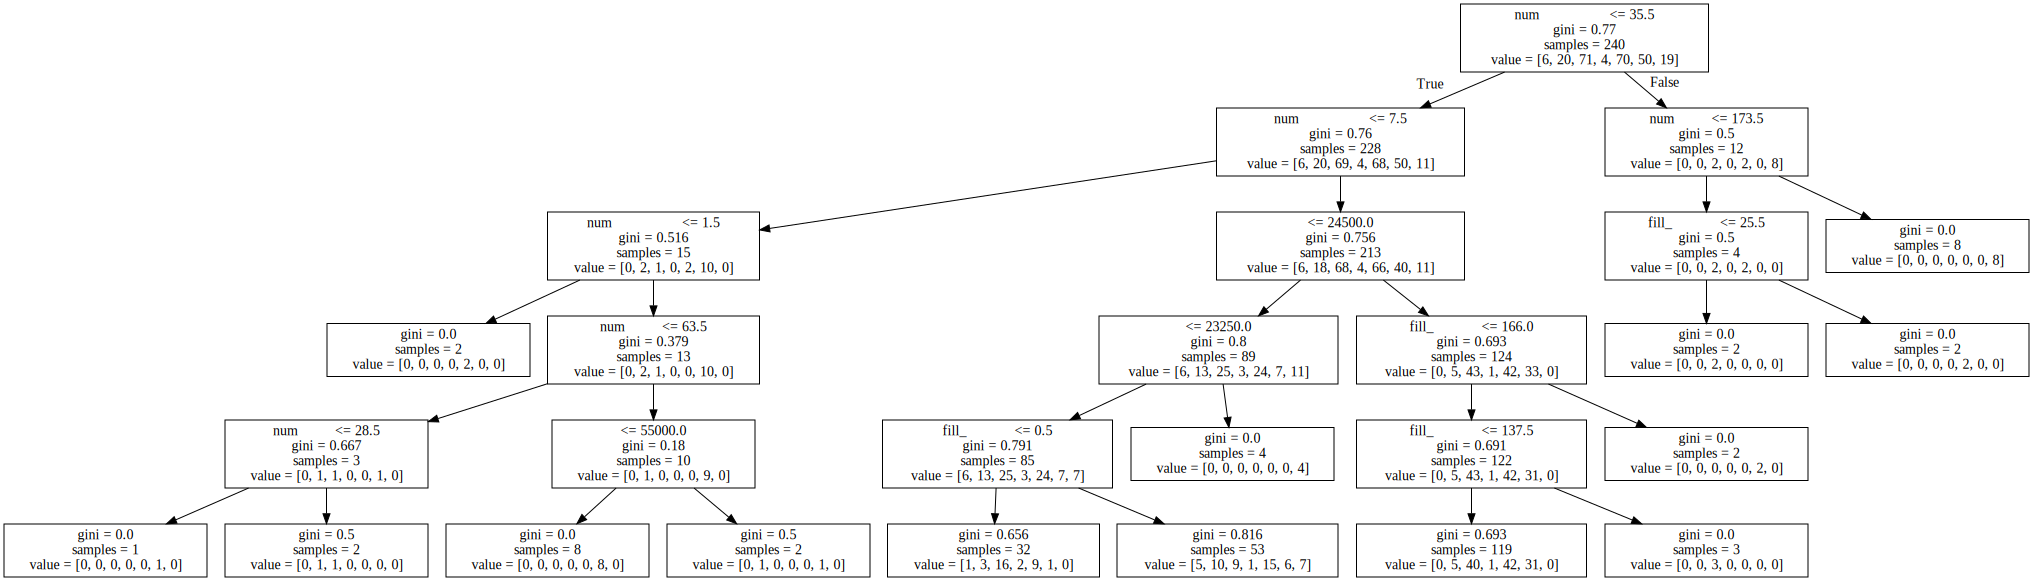

In [141]:
graphviz.Source(dot_tree)

In [144]:
model.predict(X_train), y_train

(array(['학력보완', '학력보완', '인문교양', '인문교양', '문화예술', '인문교양', '인문교양', '인문교양',
        '인문교양', '문화예술', '인문교양', '인문교양', '기타', '인문교양', '인문교양', '인문교양',
        '학력보완', '인문교양', '인문교양', '인문교양', '인문교양', '인문교양', '인문교양', '인문교양',
        '인문교양', '인문교양', '인문교양', '인문교양', '인문교양', '인문교양', '인문교양', '문화예술',
        '인문교양', '인문교양', '인문교양', '인문교양', '문화예술', '인문교양', '인문교양', '학력보완',
        '인문교양', '인문교양', '기타', '직업교육', '직업교육', '인문교양', '인문교양', '인문교양',
        '인문교양', '인문교양', '인문교양', '인문교양', '인문교양', '인문교양', '인문교양', '문화예술',
        '인문교양', '인문교양', '인문교양', '인문교양', '문화예술', '인문교양', '인문교양', '인문교양',
        '인문교양', '인문교양', '인문교양', '인문교양', '직업교육', '인문교양', '인문교양', '인문교양',
        '문화예술', '인문교양', '문화예술', '문화예술', '인문교양', '문화예술', '문화예술', '인문교양',
        '인문교양', '인문교양', '문화예술', '인문교양', '인문교양', '인문교양', '인문교양', '인문교양',
        '인문교양', '인문교양', '인문교양', '문화예술', '인문교양', '인문교양', '인문교양', '인문교양',
        '인문교양', '인문교양', '인문교양', '직업교육', '인문교양', '문화예술', '문화예술', '문화예술',
        '인문교양', '인문교양', '인문교양', '학력보완', '문화예술', '인문교양', '인문교양', '인문교

In [150]:
score=0
for i in range(len(y_train)):
  if model.predict(X_train)[i] == y_train.iloc[i]:
    score+=1
print(score/len(y_train))  

0.44583333333333336
